In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install -q yfinance

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()
from datetime import datetime
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-06-14,183.080002,183.720001,182.229996,183.660004,183.660004,25456400,AMAZON
2024-06-17,182.520004,185.000000,181.220001,184.059998,184.059998,35601900,AMAZON
2024-06-18,183.740005,184.289993,181.429993,182.809998,182.809998,36659200,AMAZON
2024-06-20,182.910004,186.509995,182.720001,186.100006,186.100006,44726800,AMAZON
2024-06-21,187.800003,189.279999,185.860001,189.080002,189.080002,72931800,AMAZON
2024-06-24,189.330002,191.000000,185.330002,185.570007,185.570007,50610400,AMAZON
2024-06-25,186.809998,188.839996,185.419998,186.339996,186.339996,45898500,AMAZON
2024-06-26,186.919998,194.800003,186.259995,193.610001,193.610001,65103900,AMAZON
2024-06-27,195.009995,199.839996,194.199997,197.850006,197.850006,74284100,AMAZON


In [5]:

AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,184.124051,185.701463,182.675672,184.195059,183.716113,6.013038e+07
std,10.801948,10.920124,10.687390,10.779052,10.810654,2.480405e+07
min,165.350006,166.399994,164.080002,165.000000,164.776505,2.404830e+07
25%,175.309998,177.080002,173.740005,175.460007,174.802902,4.663810e+07
50%,183.919998,185.149994,182.110001,184.119995,183.610962,5.343900e+07
75%,191.410004,192.570007,190.179993,191.330002,190.926041,6.613340e+07
max,217.589996,220.199997,213.164993,216.669998,216.669998,2.464214e+08


In [6]:

AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-06-28 to 2024-06-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


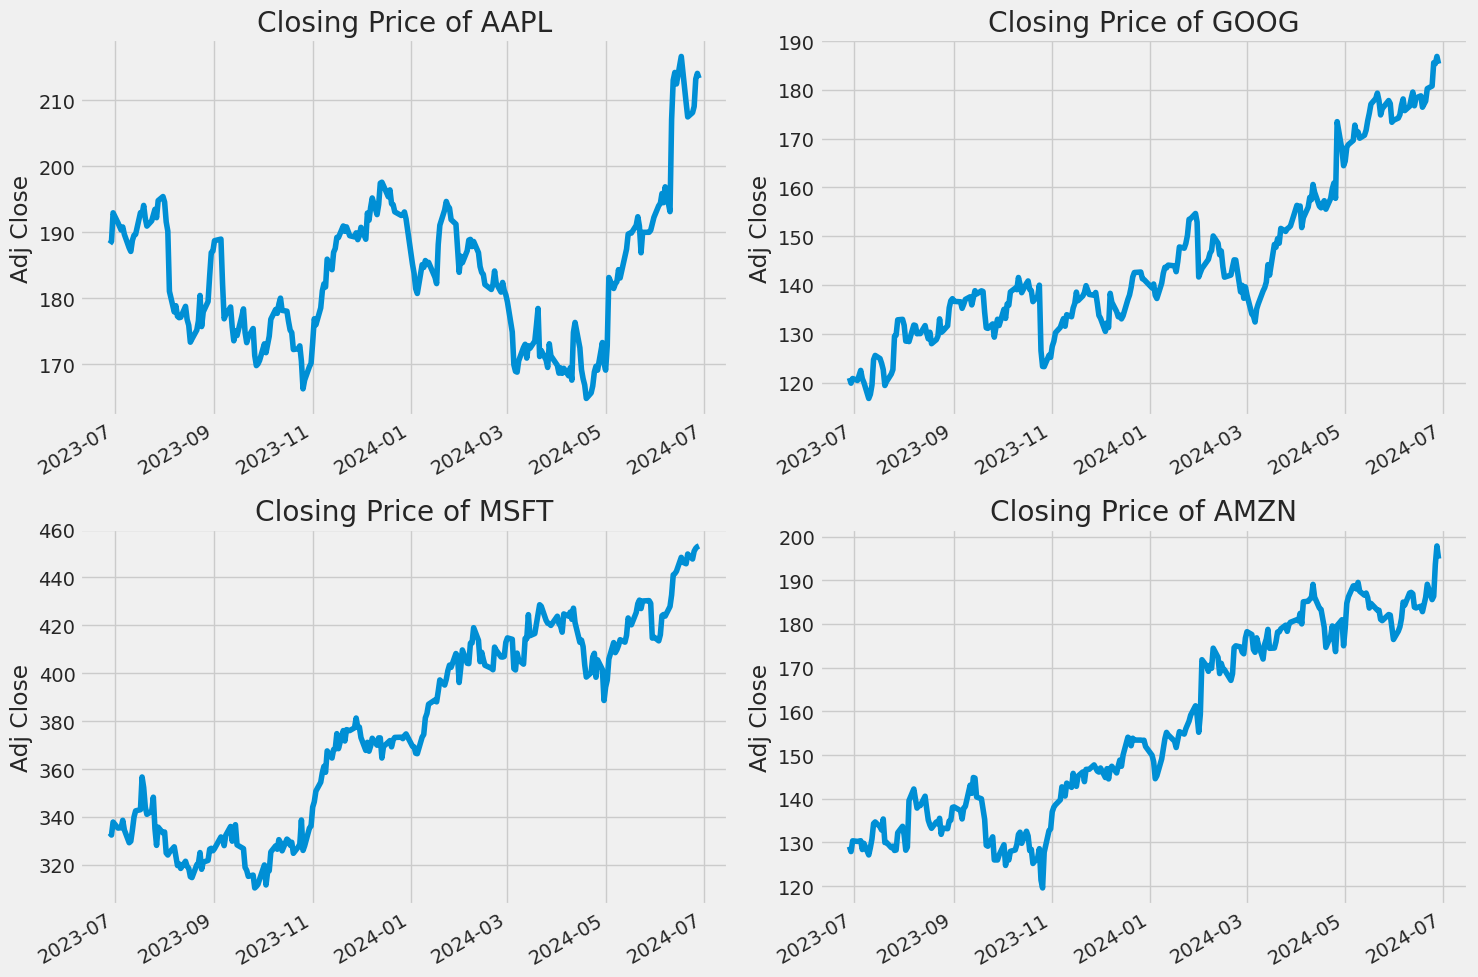

In [8]:

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()


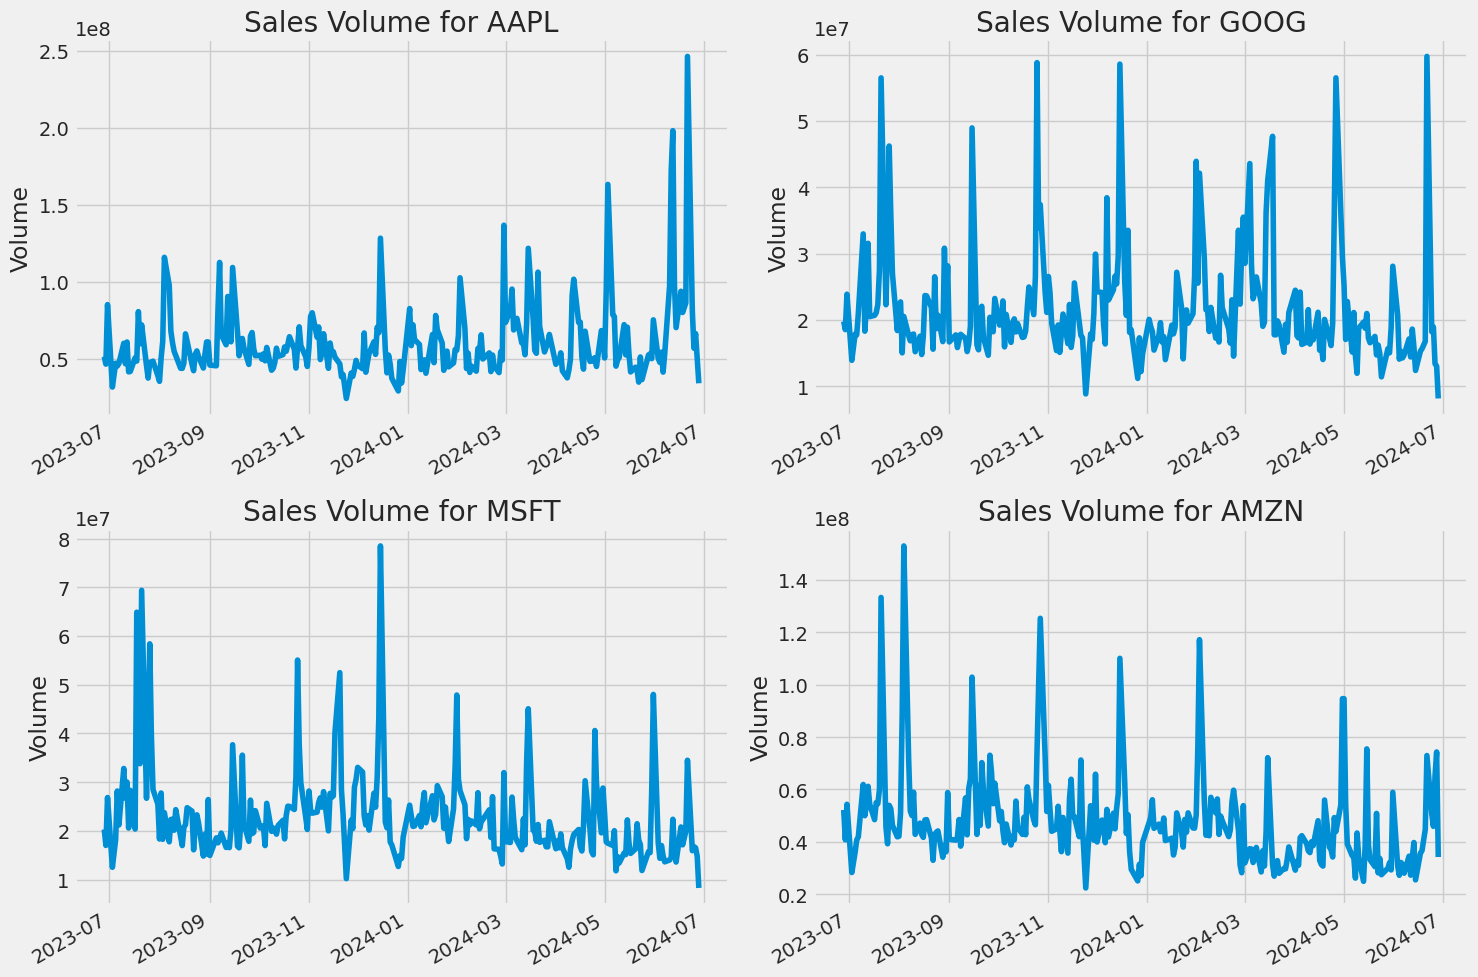

In [9]:

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

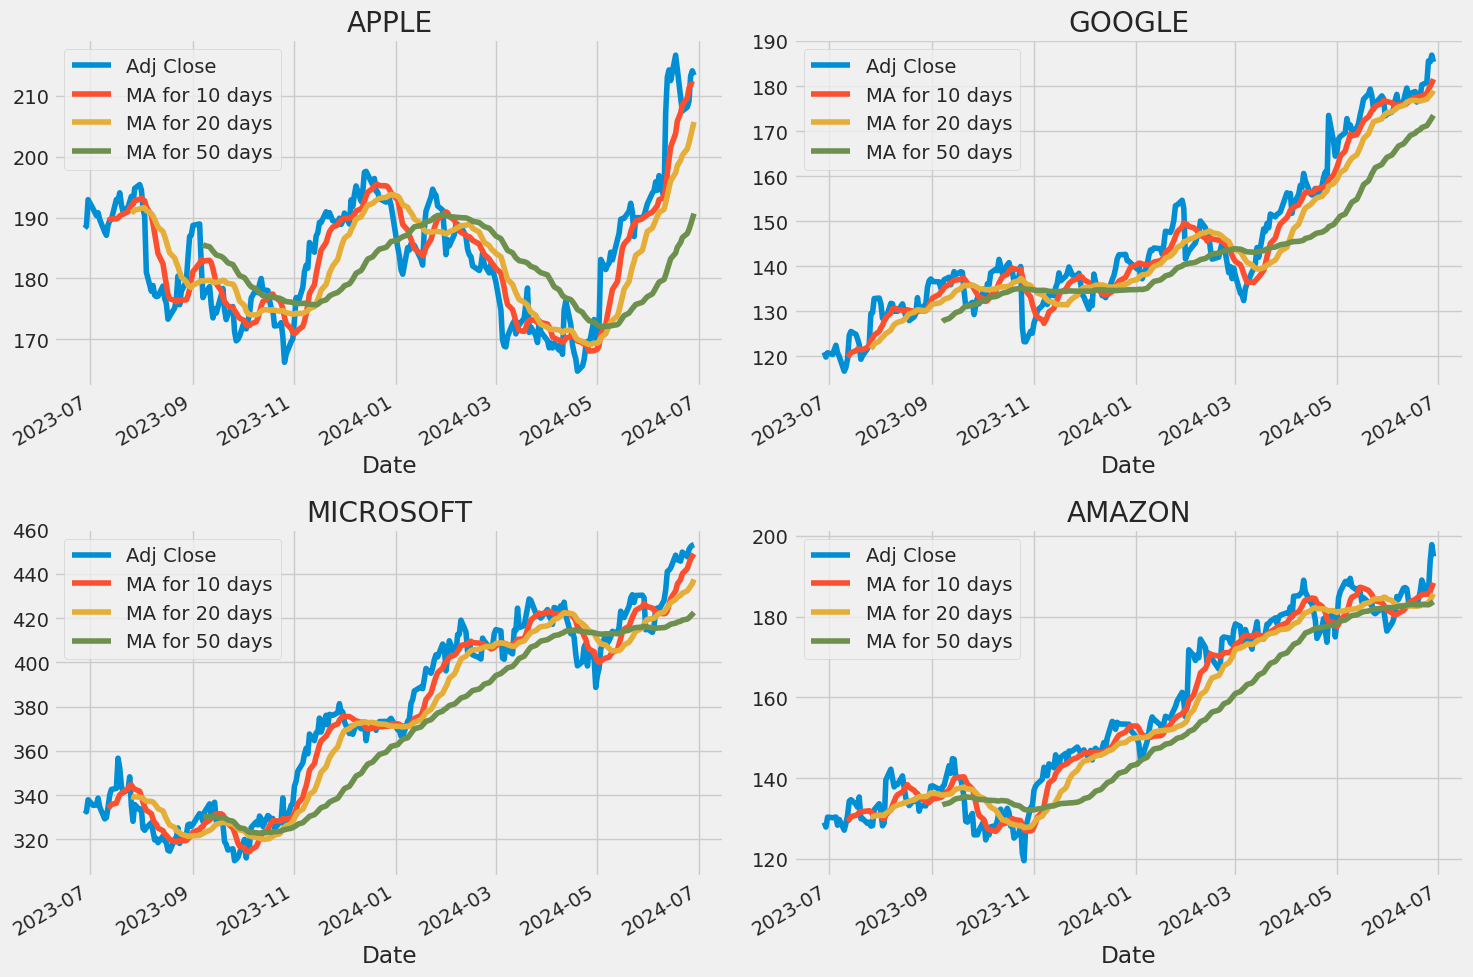

In [10]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

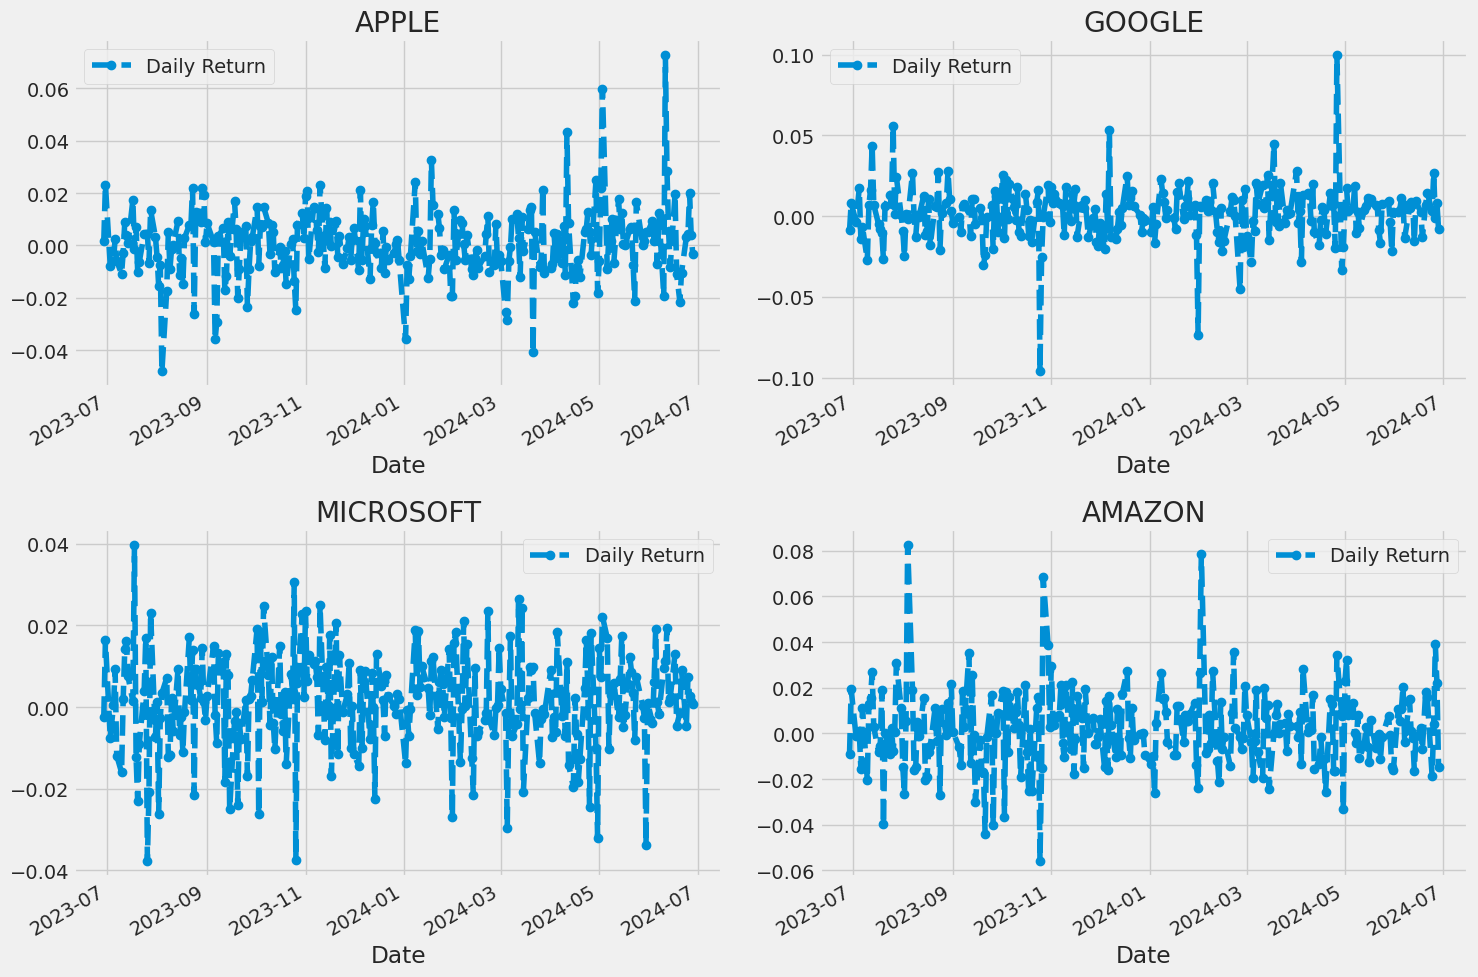

In [11]:

for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

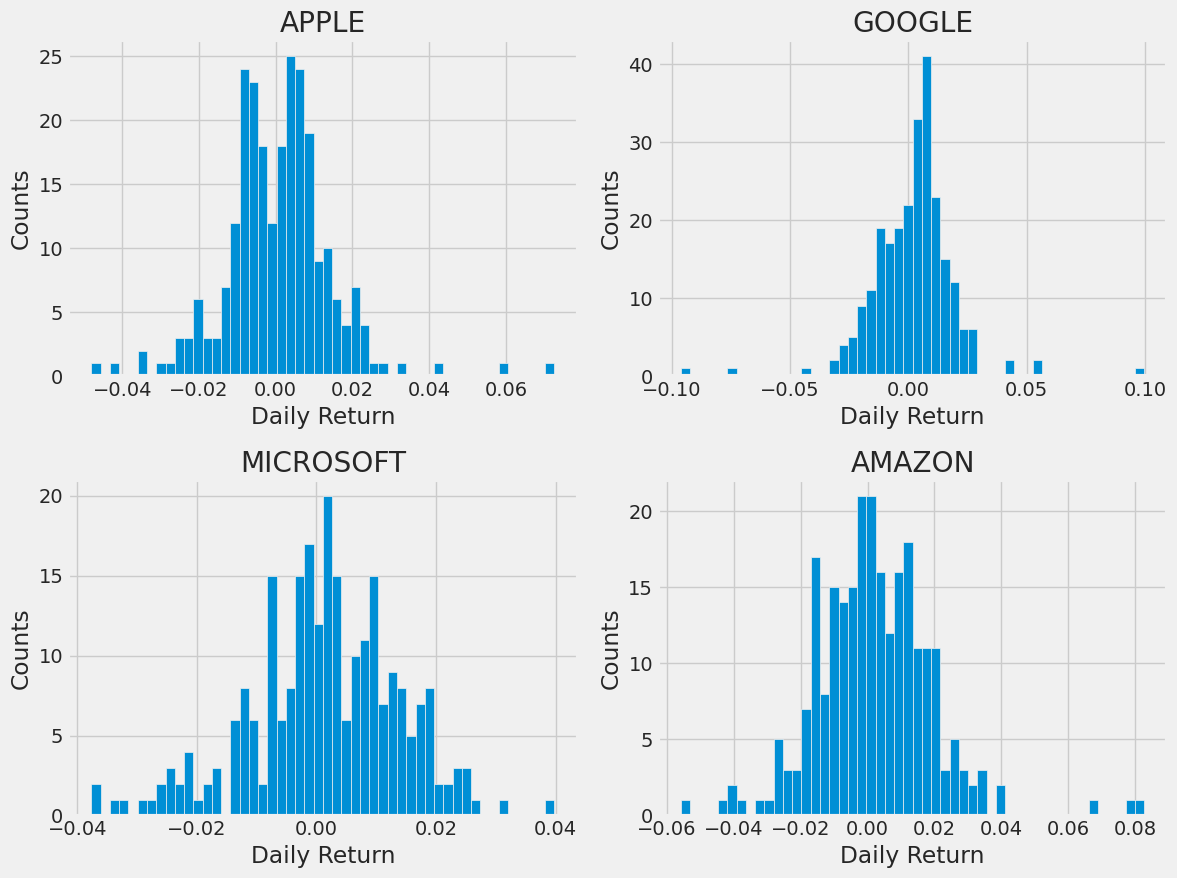

In [13]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [14]:


closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-06-28,NaN,NaN,NaN,NaN
2023-06-29,0.001797,-0.008834,-0.008837,-0.002382
2023-06-30,0.023103,0.019234,0.007999,0.016386
2023-07-03,-0.007785,-0.001074,-0.003389,-0.007488
2023-07-05,-0.005871,0.001229,0.017170,0.000473


Text(0.5, 1.0, 'Correlation of stock closing price')

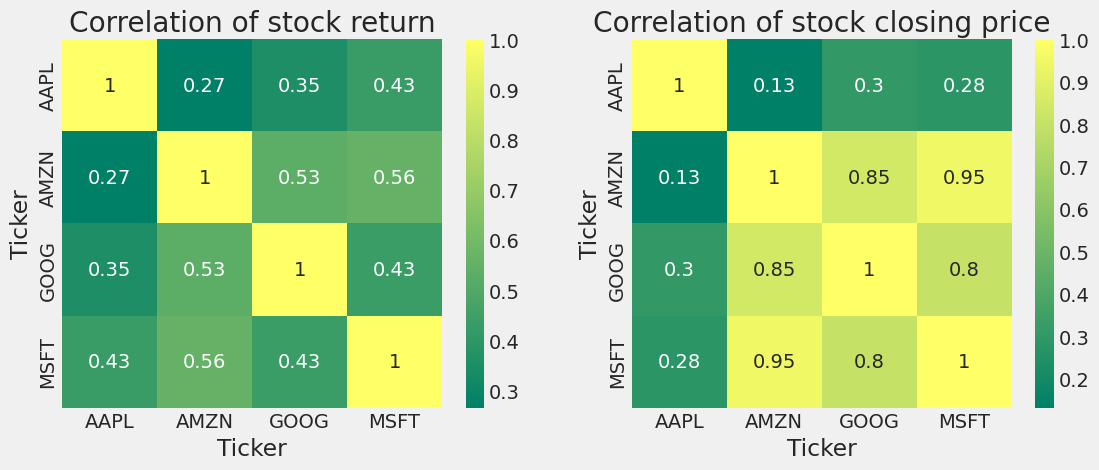

In [16]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

In [17]:

df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416983,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483710,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622307,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754259,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734028,394024400
...,...,...,...,...,...,...
2024-06-24,207.720001,212.699997,206.589996,208.139999,208.139999,80727000
2024-06-25,209.149994,211.380005,208.610001,209.070007,209.070007,56713900
2024-06-26,211.500000,214.860001,210.639999,213.250000,213.250000,66213200


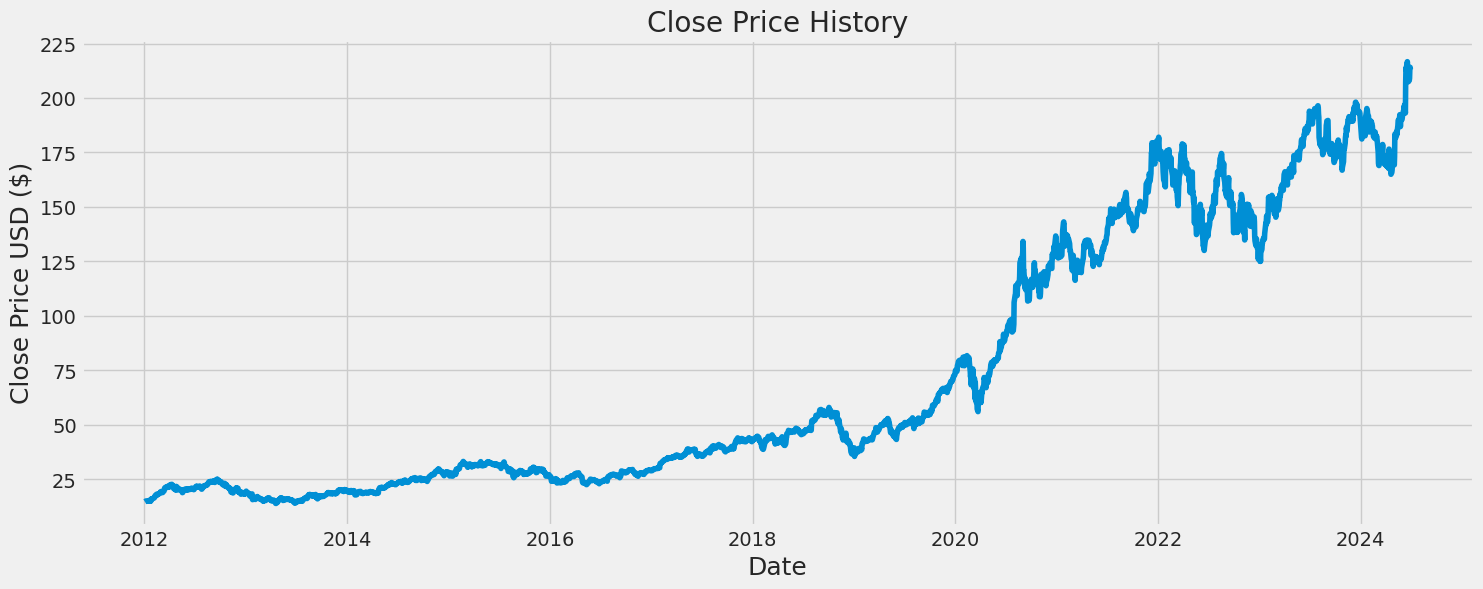

In [18]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [19]:

data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2985

In [20]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00364679],
       [0.00403613],
       [0.00484476],
       ...,
       [0.98312966],
       [0.98732261],
       [0.98246375]])

In [21]:

train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.00364679, 0.00403613, 0.00484476, 0.00561464, 0.0054966 ,
       0.00576263, 0.00564107, 0.0054367 , 0.00515835, 0.00601984,
       0.00679677, 0.00655717, 0.00524467, 0.00649727, 0.00526406,
       0.0098886 , 0.00953098, 0.00999783, 0.0110073 , 0.01161862,
       0.01156753, 0.01137903, 0.01218238, 0.01293816, 0.01379437,
       0.01517733, 0.01808242, 0.01812647, 0.01974374, 0.02095228,
       0.01887521, 0.01967503, 0.01965918, 0.02190186, 0.02158299,
       0.02217316, 0.02323373, 0.02382391, 0.02552398, 0.02676248,
       0.02712011, 0.0272452 , 0.0251276 , 0.02461669, 0.02469245,
       0.02668321, 0.02724344, 0.0284467 , 0.03128309, 0.03506729,
       0.03435907, 0.03436083, 0.03709681, 0.03795301, 0.03734344,
       0.03678674, 0.03620713, 0.0381327 , 0.03945401, 0.04000719])]
[0.03864008132174998]

[array([0.00364679, 0.00403613, 0.00484476, 0.00561464, 0.0054966 ,
       0.00576263, 0.00564107, 0.0054367 , 0.00515835, 0.00601984,
       0.00679677, 0.00655717, 0.00

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(x_train, y_train, batch_size=1, epochs=1)

2024-06-28 18:31:40.546815: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-28 18:31:40.546946: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-28 18:31:40.753331: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2925/2925 ━━━━━━━━━━━━━━━━━━━━ 118s 39ms/step - loss: 0.0017


In [23]:

test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step


6.773326479341582

/tmp/ipykernel_33/762925741.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


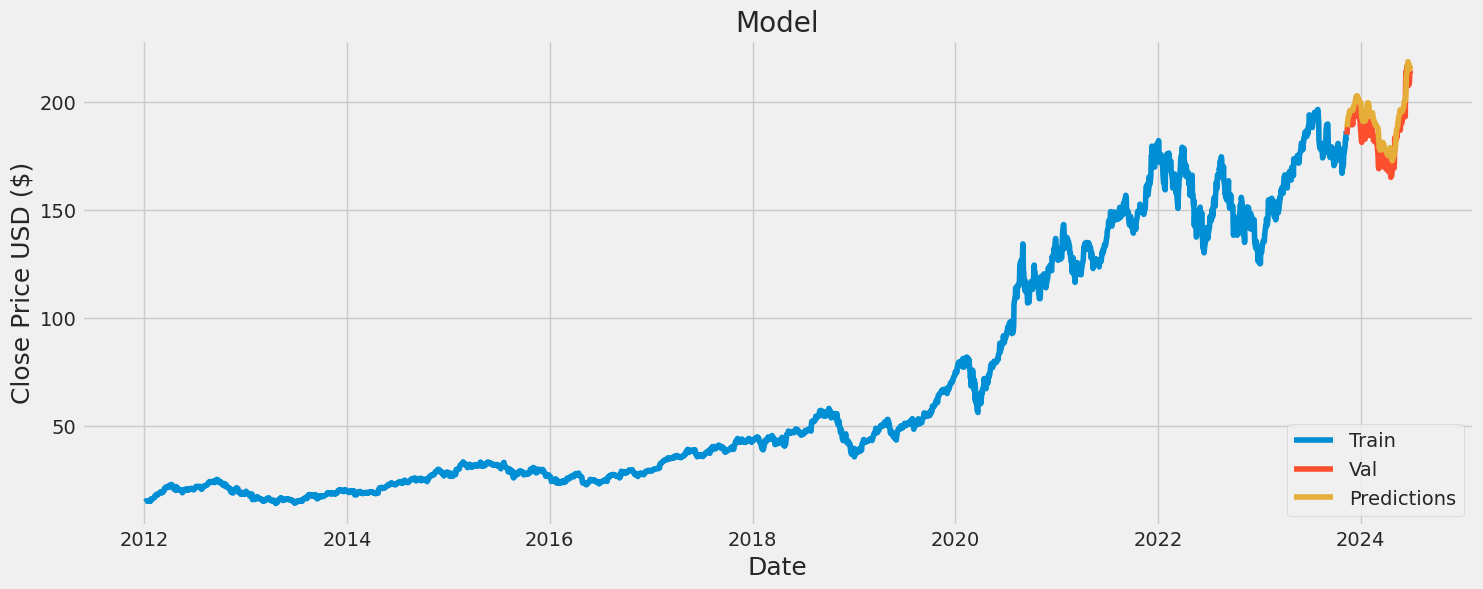

In [24]:

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()